In [1]:
#Import Packgages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib as mpl


In [2]:
#Pointwise Tax liability functon
def tax(x, tax_code = "linear", a = 60000):
    #Initially set tax liability to 0
    liability = 0
    #Round down to the next integer
    x = int(x)
    
    if tax_code == "none":
        liability = 0
 
    elif tax_code == "linear":
        tau = 0.3
        liability = tau * x
    
    elif tax_code == "abgeltung":
        tau = 0.25
        # tau = 0.28 #with church tax and solidarity surcharge
        F = 801 # for singles
        #F = 1602 #for couples
        liability = tau * max( x - F, 0)
    
    elif tax_code == "income":
        #German national income tax (§32a EStG)
        if x <= 9408:
            liability = 0
        elif x <= 14532:
            y = 1/10000 * ( x - 9408 ) 
            liability = (972.87 * y + 1400) * y
        elif x <= 57051:
            z = 1/10000 * ( x - 14532)
            liability = (212.02 * z + 2397) * z + 972.79
        elif x <= 270500:
            liability = 0.42 * x - 8963.74
        else:
            liability =  0.45 * x - 18078.74
    
    elif tax_code == "federal":
        #FX-Rate
        EURUSD = 1.12
        #Tax Base in USD
        x = x * EURUSD
        if x<= 9525:
            liability = 0.1 * max(x, 0) 
        elif x <= 38700:
            liability = 0.1 * 9525
            liability += 0.12 * ( x - 9525 ) 
        elif x<= 82500:
            liability = 0.1 * 9525
            liability += 0.12 * ( 38700 - 9525 ) 
            liability += 0.22 * ( x - 38700 )
        elif x <= 157500:
            liability = 0.1 * 9525
            liability += 0.12 * ( 38700 - 9525 ) 
            liability += 0.22 * ( 82500 - 38700 )
            liability += 0.24 * ( x - 82500 )
        elif x <= 200000:
            liability = 0.1 * 9525
            liability += 0.12 * ( 38700 - 9525 ) 
            liability += 0.22 * ( 82500 - 38700 )
            liability += 0.24 * ( 157500 - 82500 )
            liability += 0.32 * ( x - 157500 )
        elif x <= 500000:
            liability = 0.1 * 9525
            liability += 0.12 * ( 38700 - 9525 ) 
            liability += 0.22 * ( 82500 - 38700 )
            liability += 0.24 * ( 157500 - 82500 )
            liability += 0.32 * ( 200000- 157500 )
            liability += 0.35 * ( x - 200000 ) 
        else:
            liability = 0.1 * 9525
            liability += 0.12 * ( 38700 - 9525 ) 
            liability += 0.22 * ( 82500 - 38700 )
            liability += 0.24 * ( 157500 - 82500 )
            liability += 0.32 * ( 200000- 157500 )
            liability += 0.35 * ( 500000 - 200000 ) 
            liability += 0.37 * ( x - 500000 ) 
            
        #Transforming USD liability back to EUR
        liability = liability / EURUSD
    
    elif tax_code == "iso-residual":
        a = 3.40787
        rho = 0.865339
        liability = x - a * ( x ** rho )
        
    elif tax_code == "iso-residual-transformed":
        a = 3.40787
        rho = 0.865339
        if x <= a ** (1/(1 - rho)):
            liability = 0
        else: 
            liability = x - a * ( x ** rho )
    elif tax_code == "Robin-Hood":
        #a = 5000 * 12 #Average yearly net wealth  (Source: HFCS Report 2017)
        liability = x - a
    else:
        print("Tax liability function not defined. No tax" +
                                          "liability calculated!")
    
    return liability

# Marginal Tax rate
def dtax(x, tax_code = "linear"):
    return tax( x + 1, tax_code) - tax( x , tax_code)

# Test tax liabilty function
#print(tax(500000, tax_code = "abgeltung", tau = 0.3, F = 801))
# print(dtax(600000, tax_code = "federal", tau = 0, F = 0))

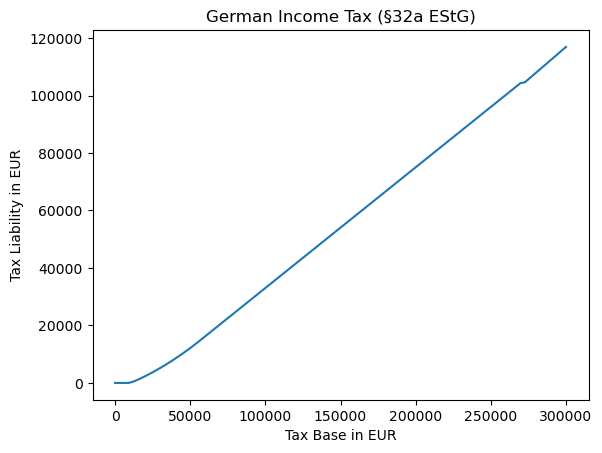

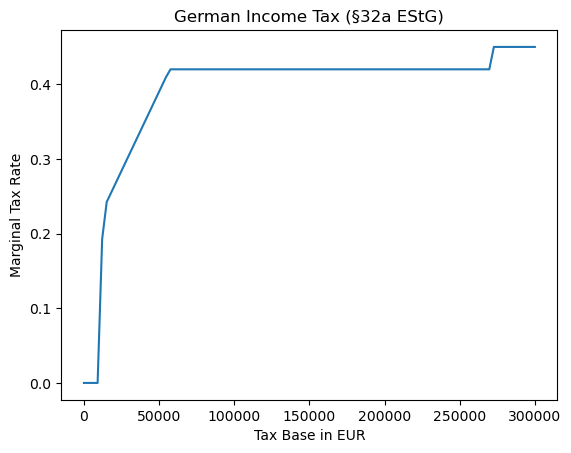

In [3]:
# Plot German income tax
bmg = np.linspace(0, 300000, 100)
tax_liability = np.array([tax(x, tax_code = "income") for x in bmg])
marginal_tax_rate = np.array([dtax(x, tax_code = "income") for x in bmg])

plt.plot(bmg, tax_liability)
plt.title("German Income Tax (§32a EStG)")
plt.xlabel("Tax Base in EUR")
plt.ylabel("Tax Liability in EUR")
plt.show()

plt.plot(bmg, marginal_tax_rate)
plt.title("German Income Tax (§32a EStG)")
plt.xlabel("Tax Base in EUR")
plt.ylabel("Marginal Tax Rate")
plt.show()

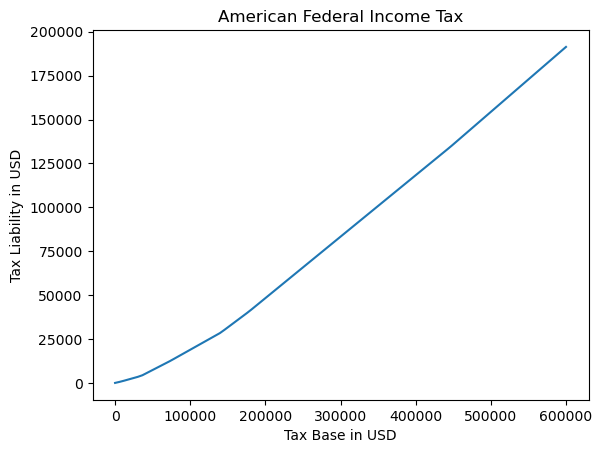

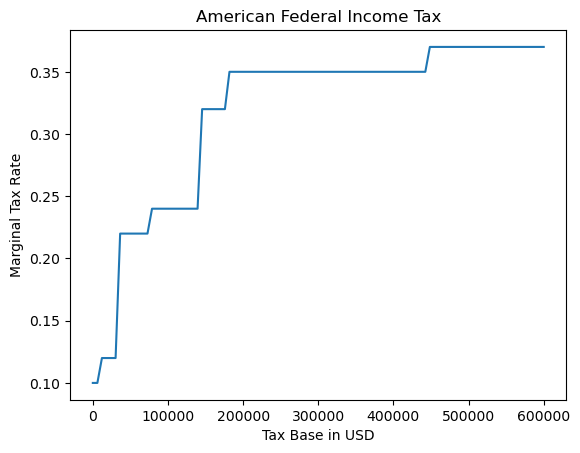

In [4]:
# Plot American Federal Income Tax
bmg = np.linspace(0, 600000, 100)
tax_liability = np.array([tax(x, tax_code = "federal") for x in bmg])
marginal_tax_rate = np.array([dtax(x, tax_code = "federal") for x in bmg])

plt.plot(bmg, tax_liability)
plt.title("American Federal Income Tax")
plt.xlabel("Tax Base in USD")
plt.ylabel("Tax Liability in USD")
plt.show()

plt.plot(bmg, marginal_tax_rate)
plt.title("American Federal Income Tax")
plt.xlabel("Tax Base in USD")
plt.ylabel("Marginal Tax Rate")
plt.show()

In [5]:
# Distribution of income per household

#Import Data
df = pd.read_csv("C:/Users/marcus.becker/Google Drive/Forschung/Tax Praxis Paper/income_structure_germany.csv", sep = ";", decimal = ",")

print(df.head(6))

print(df.info())

   Income Class  Obs (in thousands)  Avg Gross Income  Avg Net Income  \
0             1                5997              1061             920   
1             2                3038              1780            1506   
2             3                7759              2689            2142   
3             4                6718              3938            3067   
4             5                6619              5603            4245   
5             6                7598              9561            6954   

   Total Avg Net Income  Consumption  Other Expenses  Total Expenses  \
0                   944         1002             159            1161   
1                  1535         1354             444            1798   
2                  2183         1785             994            2779   
3                  3114         2441            1403            3844   
4                  4327         3105            2096            5201   
5                  7074         4481            3950    

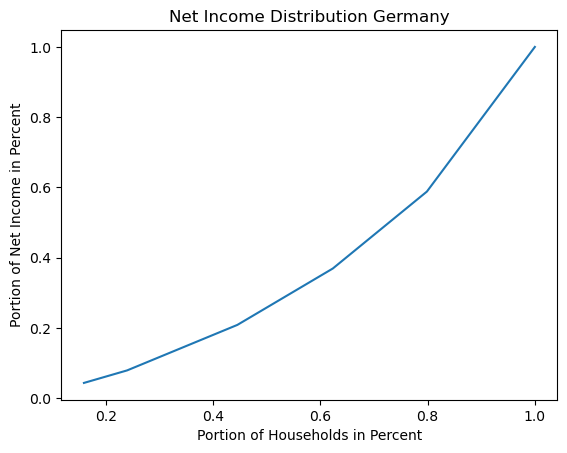

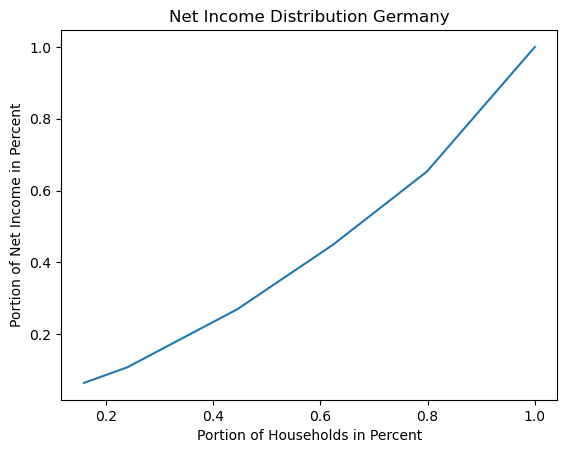

In [6]:
# Net Income Distribution
plt.plot(df["Cum Obs"], df["Cum Net"])
plt.title("Net Income Distribution Germany")
plt.xlabel("Portion of Households in Percent")
plt.ylabel("Portion of Net Income in Percent")
plt.show()

# Net Wealth Distribution (HFCS)
plt.plot(df["Cum Obs"], df["Cum Net Wealth"])
plt.title("Net Income Distribution Germany")
plt.xlabel("Portion of Households in Percent")
plt.ylabel("Portion of Net Income in Percent")
plt.show()


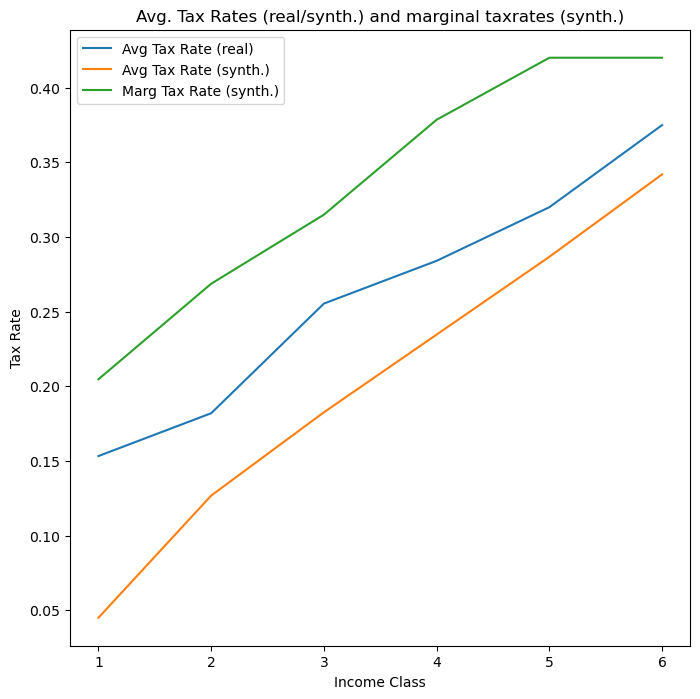

In [7]:
bmg = np.array(df["Avg Yearly Gross Income"])
tax_liability = np.array([tax(x, tax_code = "income") for x in bmg])
marginal_tax_rate = np.array([dtax(x, tax_code = "income") for x in bmg])

df["Avg Tax Liability"] = tax_liability
df["Avg Tax Rate Synthetic"] = tax_liability / bmg
df["Avg Marginal Tax Rate"] = marginal_tax_rate

# Compare Tax Rates
plt.figure( figsize =( 8, 8) )
plt.plot(df["Income Class"], df["Avg Tax Rate"], label = "Avg Tax Rate (real)")
plt.plot(df["Income Class"], df["Avg Tax Rate Synthetic"], label = "Avg Tax Rate (synth.)")
plt.plot(df["Income Class"], df["Avg Marginal Tax Rate"], label = "Marg Tax Rate (synth.)")
plt.title("Avg. Tax Rates (real/synth.) and marginal taxrates (synth.)")
plt.xlabel("Income Class")
plt.ylabel("Tax Rate")
plt.legend()
plt.savefig("marginal_tax_rates_income.png", dpi=400)
plt.show()

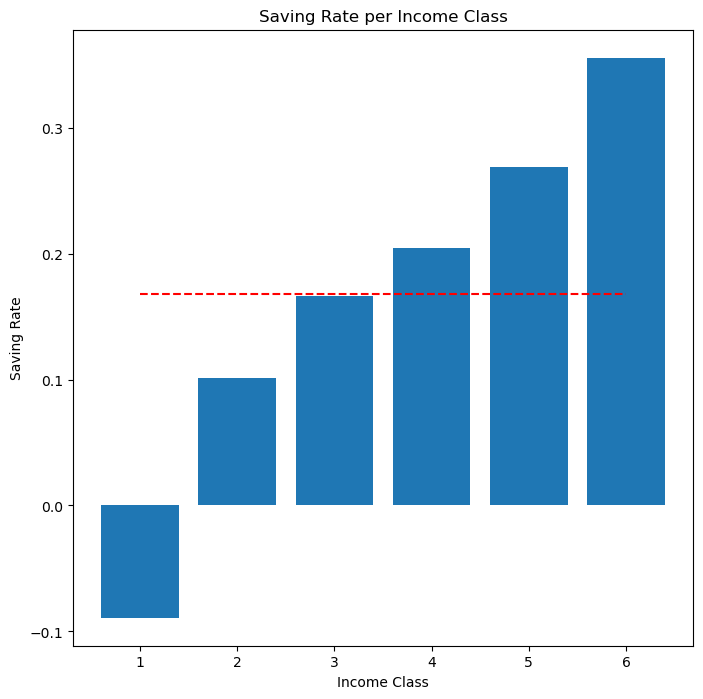

In [8]:
# Plot Reltive Saving Rate per Class
df["Saving Rate"] = 1- df["Consumption"] / df["Avg Net Income"]

plt.figure( figsize =( 8, 8) )
plt.bar(df["Income Class"], df["Saving Rate"])
#plot avg saving rate for comparison
plt.plot(df["Income Class"], df["Saving Rate"].mean()*np.ones(len(df["Income Class"])),'r--')
plt.title("Saving Rate per Income Class")
plt.xlabel("Income Class")
plt.ylabel("Saving Rate")
plt.savefig("saving_rate.png", dpi=400)
plt.show()

Text(0, 0.5, 'Portion of Net Income in Percent')

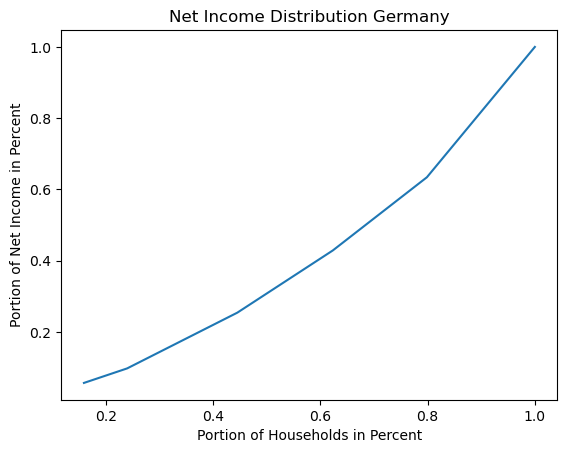

In [9]:
# Annual Gross Income growth rate
g = 0.02845  #CAGR of  Gross oncome from 2010 - 2019 (Statista)

# Clientele Effects
g_mult = np.array([0, 0.01, 0.02, 0.05, 0.08, 0.1])

# Annual Capital growth rate (Nooe r = k)
k = 0.0728 # CAGR of MSCI Performance from 2010-2019 (Statista)

# Clientele Effects
k_mult = np.array([-0.01, 0.02, 0.03, 0.07, 0.09, 0.11])

# Abgeltungsteuer
tau = 0.25 #without Soli and Kist
#tau = 0.28 #with Soli and KiSt


k_net = k * (1 - tau)

k_mult_net = k_mult * (1 - tau)

gross_income = bmg
net_income = gross_income - tax_liability 
net_wealth = df["Avg Net Wealth (HFCS)"]
consumption = df["Consumption"] * 12

net_wealth = net_wealth + (net_income - consumption) 

obs = df["Obs"]
cum_obs = df["Cum Obs"]

total_net_wealth = np.sum(net_wealth * obs) #= net_wealth.T @ obs

rel_net_wealth = net_wealth * obs / total_net_wealth

cum_net_wealth = np.array([ np.sum(rel_net_wealth[:i]) 
                            for i in range(1, len(rel_net_wealth) + 1)])

# Net Wealth Distribution (HFCS)
plt.plot(cum_obs  , cum_net_wealth)
plt.title("Net Income Distribution Germany")
plt.xlabel("Portion of Households in Percent")
plt.ylabel("Portion of Net Income in Percent")

Model:  linear
[0.05110178 0.03726514 0.14845299 0.17003358 0.20692541 0.38622109]
[0.04050237 0.03264317 0.13793176 0.16281938 0.20925353 0.41684979]
[0.03192275 0.0289022  0.1294188  0.1569838  0.21113812 0.44163432]
[0.02483546 0.02581208 0.1223891  0.15216607 0.2126953  0.46210199]
[0.01888171 0.0232163  0.11648623 0.1481223  0.21400356 0.4792899 ]
[0.01380904 0.02100502 0.11145921 0.14467992 0.21511867 0.49392815]
[0.00943569 0.01909863 0.1071265  0.14171429 0.21608046 0.50654443]
[0.00559563 0.01743872 0.10335728 0.13913746 0.21692532 0.5175456 ]
[0.00217416 0.01598051 0.10005067 0.13688081 0.21767815 0.5272357 ]
[-0.00090214  0.0146895   0.09712708  0.13488935  0.21835514  0.53584108]
Total Net Wealth in t = 9 (in Bn.): 7.97
Compound tax revenues in t = 9 (in Bn.): 8.85
Total Welfare in t = 9 (in Bn.): 16.82


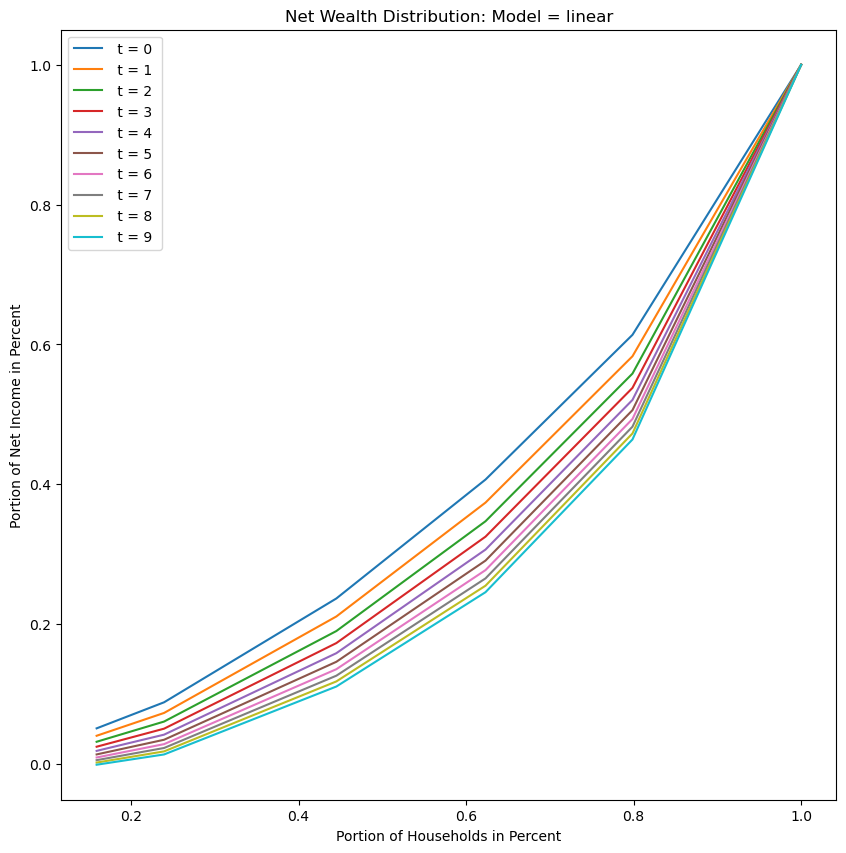

Model:  abgeltung
[0.05090642 0.0371921  0.14770325 0.16957038 0.20730407 0.38732378]
[0.04087505 0.03282708 0.13734042 0.16250395 0.20975489 0.4166986 ]
[0.03317675 0.02947772 0.12939362 0.15708821 0.21163593 0.43922777]
[0.02707896 0.02682483 0.12310408 0.15280467 0.21312643 0.45706103]
[0.0221269  0.02467072 0.11800106 0.14933165 0.21433724 0.47153243]
[0.01802326 0.02288608 0.11377631 0.1464588  0.21534103 0.48351452]
[0.0145661  0.02138277 0.11022003 0.14404242 0.21618706 0.49360161]
[0.01161236 0.0200986  0.10718486 0.14198175 0.21691031 0.50221212]
[0.00905862 0.01898855 0.1045635  0.14020361 0.21753573 0.50964999]
[0.00682829 0.0180192  0.10227628 0.13865355 0.21808217 0.5161405 ]
Total Net Wealth in t = 9 (in Bn.): 9.54
Compound tax revenues in t = 9 (in Bn.): 7.54
Total Welfare in t = 9 (in Bn.): 17.08


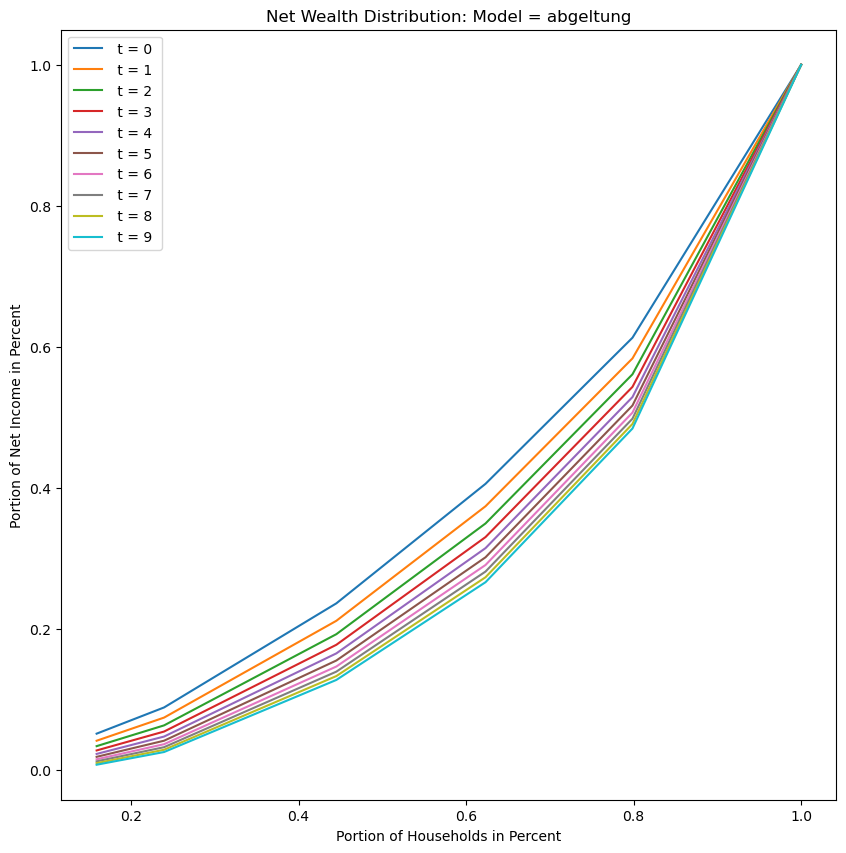

Model:  income
[0.05730476 0.04070251 0.15650384 0.17451298 0.20528107 0.36569485]
[0.05177828 0.03885072 0.152481   0.17088654 0.20617236 0.37983111]
[0.04738645 0.03737815 0.14929738 0.1679468  0.20679393 0.39119729]
[0.04378823 0.03617132 0.1466996  0.16548106 0.20723275 0.40062703]
[0.04076581 0.03515797 0.14452575 0.16335389 0.20754425 0.40865234]
[0.03817404 0.03428996 0.14266722 0.16147385 0.20776574 0.41562919]
[0.03591394 0.03353363 0.14104851 0.1597774  0.20792253 0.42180399]
[0.03391533 0.0328649  0.13961607 0.15821932 0.20803267 0.42735171]
[0.0321261  0.03226591 0.13832891 0.15677249 0.20810766 0.43239894]
[0.03050746 0.03172332 0.13715626 0.1554185  0.20815578 0.43703868]
Total Net Wealth in t = 9 (in Bn.): 8.32
Compound tax revenues in t = 9 (in Bn.): 8.59
Total Welfare in t = 9 (in Bn.): 16.91


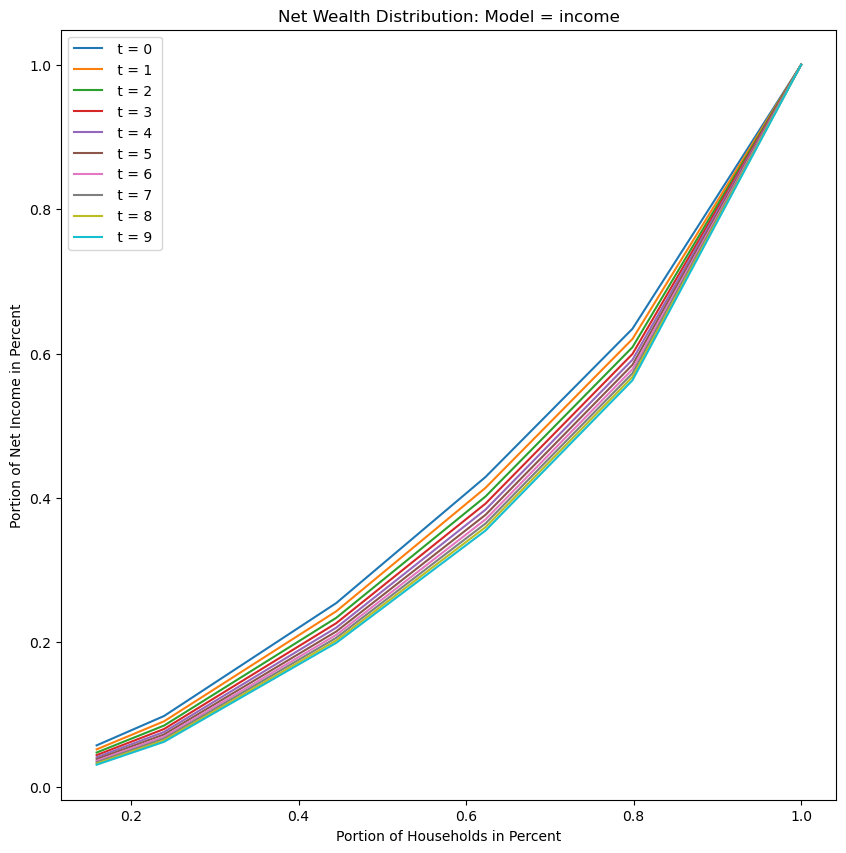

Model:  federal
[0.05136465 0.03794225 0.15040271 0.17112159 0.20792785 0.38124096]
[0.04260222 0.03450695 0.14289882 0.16567626 0.21052502 0.40379073]
[0.03634587 0.0320636  0.13760114 0.1617197  0.21235227 0.41991742]
[0.03165391 0.03024039 0.13360681 0.15870573 0.21371788 0.43207527]
[0.02800414 0.02883181 0.13043709 0.15633344 0.2147622  0.44163131]
[0.02508189 0.02771256 0.12784565 0.15441162 0.21557518 0.4493731 ]
[0.02268768 0.02680301 0.12567539 0.15281705 0.21622097 0.45579591]
[0.02068892 0.02605024 0.1238221  0.15146814 0.21674229 0.46122831]
[0.01899718 0.02542207 0.12223478 0.15033458 0.21720586 0.46580553]
[0.01754671 0.02489259 0.12086239 0.14937707 0.21763516 0.46968608]
Total Net Wealth in t = 9 (in Bn.): 11.75
Compound tax revenues in t = 9 (in Bn.): 5.70
Total Welfare in t = 9 (in Bn.): 17.45


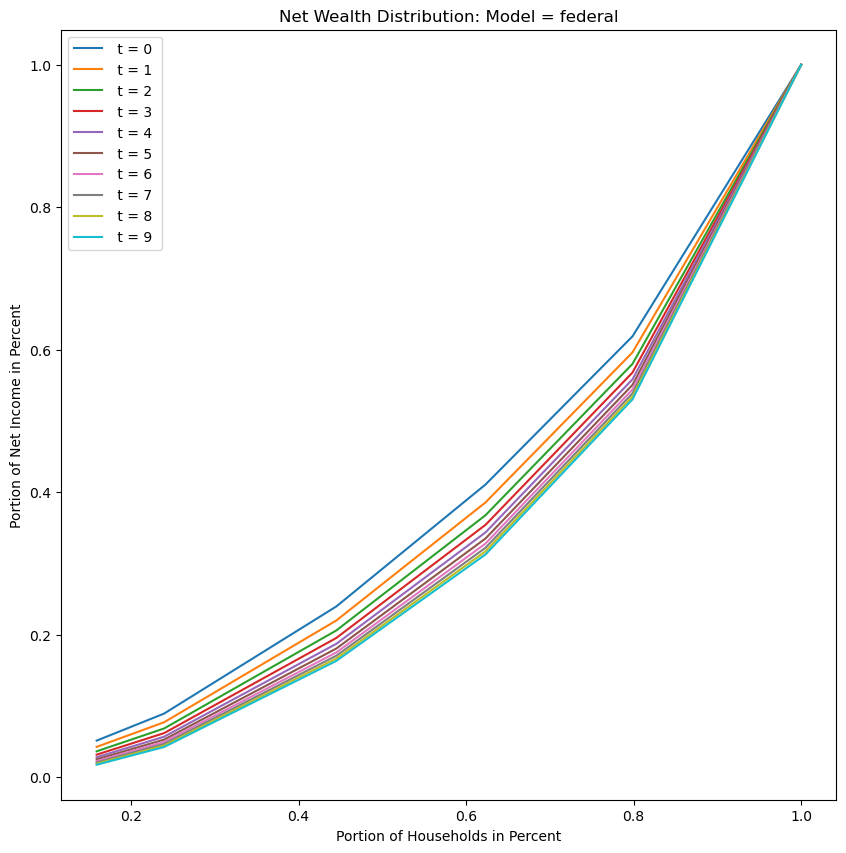

Model:  iso-residual
[0.05830292 0.04129684 0.15430323 0.17250074 0.20788525 0.36571102]
[0.05458306 0.0404252  0.15030121 0.16891347 0.21059724 0.37517983]
[0.05236556 0.04009327 0.14820657 0.16697283 0.21246896 0.37989281]
[0.05098981 0.04002741 0.14712749 0.1659212  0.21376563 0.38216846]
[0.05009668 0.04008227 0.14658504 0.16535066 0.21466375 0.3832216 ]
[0.04948014 0.04017891 0.14631593 0.16503763 0.21528803 0.38369936]
[0.04901854 0.0402762  0.14617541 0.16485889 0.21572519 0.38394576]
[0.0486387  0.0403534  0.14608508 0.16474668 0.21603927 0.38413687]
[0.04829608 0.04040186 0.14600412 0.16466506 0.21627263 0.38436024]
[0.04796425 0.04041988 0.14591247 0.16459554 0.21645562 0.38465224]
Total Net Wealth in t = 9 (in Bn.): 3.88
Compound tax revenues in t = 9 (in Bn.): 12.43
Total Welfare in t = 9 (in Bn.): 16.31


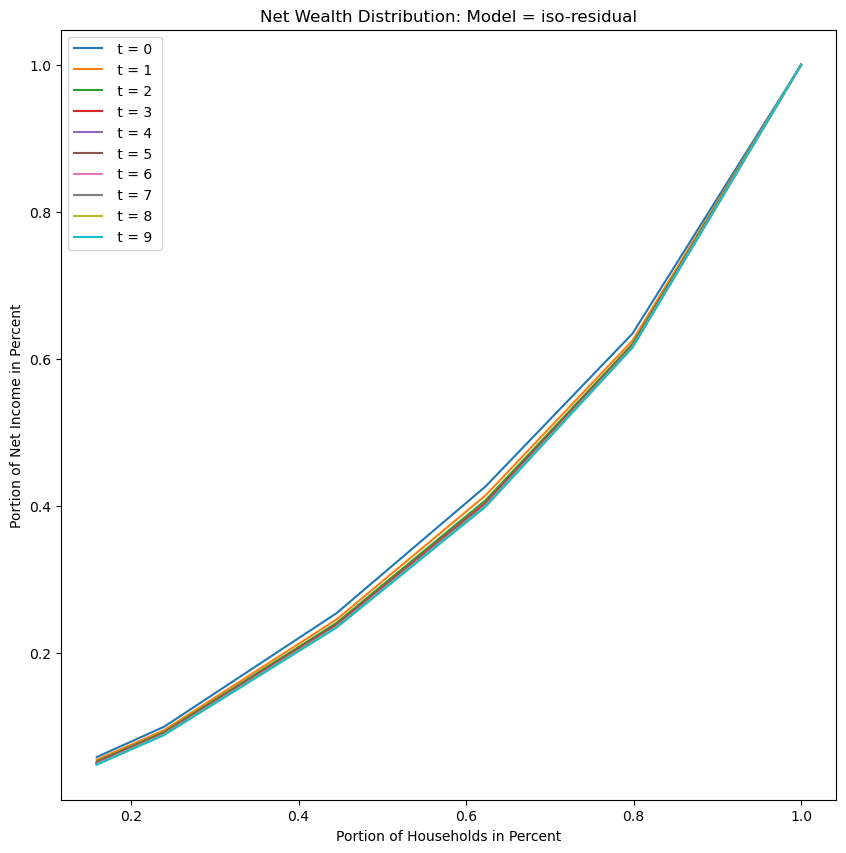

Model:  iso-residual-transformed
[0.05554938 0.03985902 0.15394912 0.17311655 0.20688797 0.37063796]
[0.04905106 0.03749776 0.14829985 0.16874068 0.20897878 0.38743186]
[0.04410845 0.03570082 0.1440216  0.16542182 0.21055483 0.40019249]
[0.0402042  0.03428058 0.14065857 0.16280847 0.21178783 0.41026035]
[0.03702778 0.03312441 0.13793701 0.16068964 0.21278029 0.41844087]
[0.03438123 0.03216047 0.13568243 0.1589307  0.2135976  0.42524757]
[0.03213253 0.03134088 0.13377804 0.15744178 0.21428326 0.43102351]
[0.03018987 0.03063244 0.13214365 0.15616075 0.21486798 0.43600532]
[0.02848813 0.03001137 0.13072151 0.15504311 0.21537289 0.44036299]
[0.02697925 0.02946032 0.12946914 0.15405625 0.21581421 0.44422082]
Total Net Wealth in t = 9 (in Bn.): 9.57
Compound tax revenues in t = 9 (in Bn.): 7.53
Total Welfare in t = 9 (in Bn.): 17.11


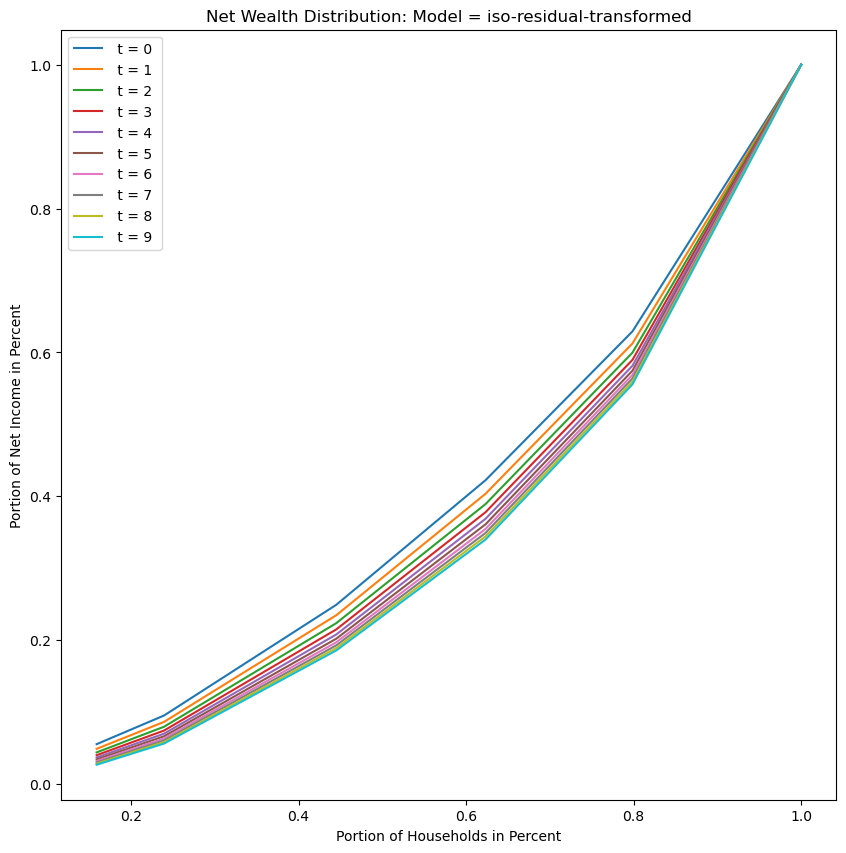

Model:  Robin-Hood
[0.15894935 0.08052161 0.20565083 0.17805932 0.17543534 0.20138355]
[0.15894956 0.08052194 0.20565011 0.17805944 0.17543667 0.20138227]
[0.15894968 0.08052205 0.20565068 0.17805938 0.1754354  0.20138282]
[0.15894939 0.08052172 0.20565076 0.1780592  0.17543489 0.20138403]
[0.15894995 0.08052159 0.20565061 0.1780591  0.17543517 0.20138359]
[0.15894922 0.08052163 0.20565132 0.17805936 0.17543524 0.20138323]
[0.15894957 0.08052161 0.20565084 0.17805926 0.17543512 0.20138361]
[0.15894936 0.08052164 0.20565067 0.17805912 0.17543569 0.20138352]
[0.15894938 0.08052145 0.20565083 0.17805944 0.17543515 0.20138375]
[0.15894934 0.0805216  0.20565092 0.17805901 0.17543552 0.20138362]
Total Net Wealth in t = 9 (in Bn.): 16.61
Compound tax revenues in t = 9 (in Bn.): 1.48
Total Welfare in t = 9 (in Bn.): 18.09


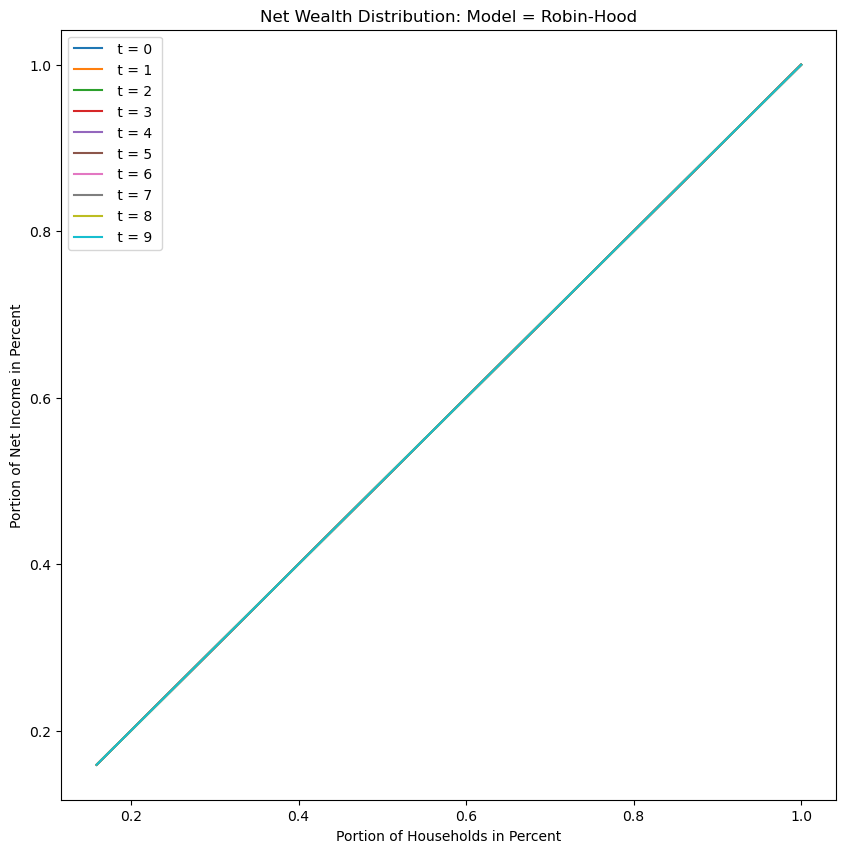

In [10]:
# =============================================================================
#   Final Model 
# =============================================================================

g = 0.02845 
k = 0.0728 

#g = 0.1
#k = 0

#g = g_mult
#k = k_mult
        
model = ["linear", "abgeltung", "income", "federal", "iso-residual", 
         "iso-residual-transformed", "Robin-Hood"]

#model = ["income"]

for model in model:
    
    compound_tax = np.zeros(len(df["Avg Yearly Gross Income"]))
    
    print("Model: ", model)
    plt.figure( figsize =( 10, 10) )
    
    for t in range(0, 10, 1):
                   
        if t == 0:
            bmg = np.array(df["Avg Yearly Gross Income"]) 
        else:
            bmg = bmg * (1 + g ) 
    
        tax_liability = np.array([ tax(x, tax_code = model, a = bmg.mean()) for x in bmg])
        
        #print(tax_liability)
        
        net_income = bmg - tax_liability 
        
        #print(net_income)
        
        if t== 0:
            net_wealth = df["Avg Net Wealth (HFCS)"] 
            consumption = df["Consumption"] * 12 
            #other = df["Other Expenses"] * 12 
            other = np.zeros(len(net_income))
            tax_cap = np.zeros(len(net_income))
        else:
            #Tax Base for Capital Tax
            delta_net_wealth = net_wealth * k 
            bmg_cap = delta_net_wealth  
            #print(bmg_cap)
            tax_cap =  np.array([ tax(x, tax_code = "abgeltung") for x in bmg_cap ]).real
            #print(tax_cap)
            net_wealth = net_wealth * (1 + k) 
            consumption = consumption * (1 + g) 
            other = other * (1 + g) 
        
        if model in ["Robin-Hood", "iso-residual"] :
            bmg_cap = net_wealth  - consumption - other 
            tax_cap =  np.array([ tax(x, tax_code = model, a = bmg_cap.mean()) for x in bmg_cap ]).real
        
        net_wealth = net_wealth + net_income - consumption - other - tax_cap
        
        #print(net_wealth)
        
        obs = df["Obs"]
        cum_obs = df["Cum Obs"]
        
        total_net_wealth = np.sum(net_wealth * obs) #= net_wealth.T @ obs
        #print("Total net wealth in %i (in Mrd.): %d"  % (t, total_net_wealth/1000000000))
        
        # Total Tax Revenues (income tax + capital tax)
        total_tax_revenues = np.sum(tax_liability  * obs) + np.sum(tax_cap * obs)
        #print("Tax revenues in %i (in Mrd.): %d"  % (t, total_tax_revenues/1000000000))
        
        compound_tax += (( tax_liability + tax_cap ) * obs)
        #print(compound_tax)
        compound_tax *= (1+g)
        #print(compound_tax)
        
        
        rel_net_wealth = (net_wealth * obs) / total_net_wealth
        
        #print( "Relative Net Wealth in %i: %s" % (t, str(rel_net_wealth)) )
        print( rel_net_wealth.values )
        
        cum_net_wealth = np.array([ np.sum(rel_net_wealth[:i]) 
                                    for i in range(1, len(rel_net_wealth) + 1)])
        
        # Net Wealth Distribution (HFCS)
        #plt.plot(net_wealth , label = " t = %i " % t)
        plt.plot(cum_obs  , cum_net_wealth, label = " t = %i " % t) 
        plt.title("Net Wealth Distribution: Model = %s" % model )
        plt.xlabel("Portion of Households in Percent")
        plt.ylabel("Portion of Net Income in Percent")
        plt.legend()
    print("Total Net Wealth in t = %i (in Bn.): %.2f" % (t, total_net_wealth/1000000000000))
    print("Compound tax revenues in t = %i (in Bn.): %.2f" % (t, np.sum(compound_tax)/1000000000000))
    print("Total Welfare in t = %i (in Bn.): %.2f" % (t, (total_net_wealth + np.sum(compound_tax))/1000000000000))
    plt.show()

In [11]:
# =============================================================================
# Sensitivity Analysis
# =============================================================================
    
def inequality_index(T = 10, g = g, k = k, model = "income" , printing = False, measure = "rich quantile" ):
    
    # Inequality Coefficient 
    ineq = 0
    
    for t in range(0, T, 1):
                   
        if t == 0:
            bmg = np.array(df["Avg Yearly Gross Income"])
        else:
            bmg = bmg * ( 1 + g ) 
    
        tax_liability = np.array([ tax(x, tax_code = model, a = bmg.mean()) for x in bmg])
               
        net_income = bmg - tax_liability 
               
        if t== 0:
            net_wealth = df["Avg Net Wealth (HFCS)"] 
            consumption = df["Consumption"] * 12  
            #consumption = np.zeros(len(net_income))
            other = np.zeros(len(net_income))
            tax_cap = np.zeros(len(net_income))
        else:
            #Tax Base for Capital Tax
            delta_net_wealth = net_wealth * k 
            bmg_cap = delta_net_wealth  
            tax_cap =  np.array([ tax(x, tax_code = "abgeltung") for x in bmg_cap ]).real
            net_wealth = net_wealth * (1 + k) 
            consumption = consumption * (1 + g) 
            other = other * (1 + g) 
        
        if model in ["Robin-Hood", "iso-residual"] :
            bmg_cap = net_wealth  - consumption - other 
            tax_cap =  np.array([ tax(x, tax_code = model, a = bmg_cap.mean()) for x in bmg_cap ]).real
        
        net_wealth = net_wealth + net_income - consumption - other - tax_cap
        
        obs = df["Obs"]
        
        total_net_wealth = np.sum(net_wealth * obs) #= net_wealth.T @ obs
        
        
        rel_net_wealth = (net_wealth * obs) / total_net_wealth
        
        rel_net_wealth = rel_net_wealth.values
        
        if printing: 
            print( rel_net_wealth )
    # Rel. Wealth last Quantile / Rel. Net Wealth First Quantile  
    # The higher the inequality coefficient the more unequally 
    # distributed the net wealth 
    #i
    if measure == "rich quantile":
        ineq = rel_net_wealth[-1]
    elif measure == "poor quantile":
        ineq = rel_net_wealth[0]
    elif measure == "inequality coefficient":
        ineq = rel_net_wealth[-1] / rel_net_wealth[0]
    else:
        print("Inequality measure does not exist")
        
    return ineq
    

# Test 
test = inequality_index(T = 1, g = g, k = k, model = "income", printing = "True", measure = "rich quantile")
print(test)

[0.05730476 0.04070251 0.15650384 0.17451298 0.20528107 0.36569485]
0.3656948458465625


In [17]:
# 3D Surfacte Plot of different g and k levels
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

    

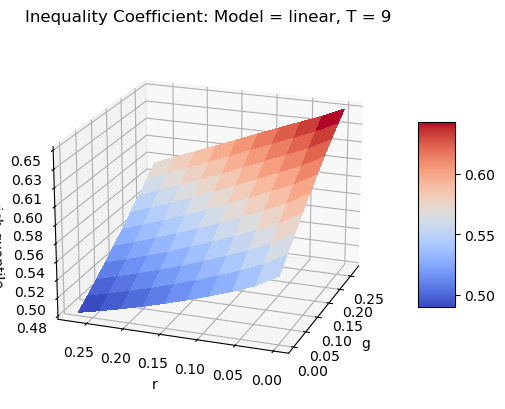

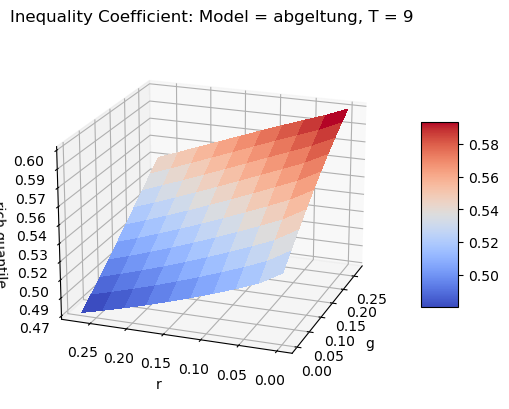

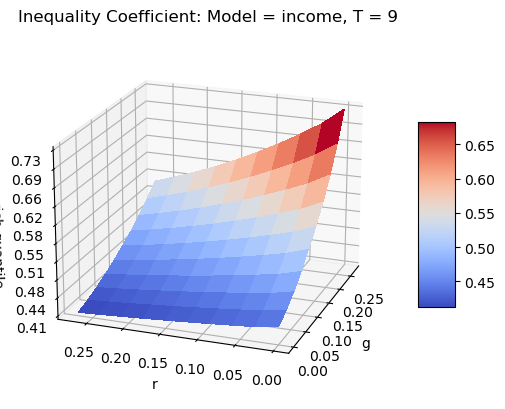

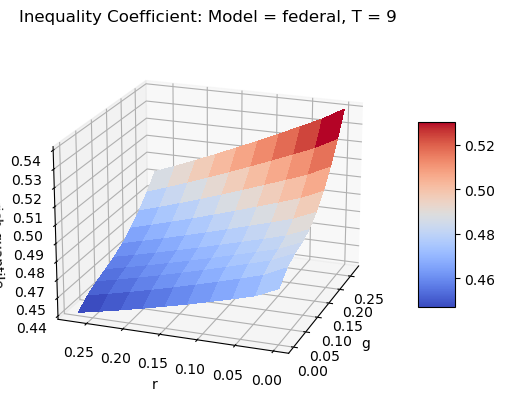

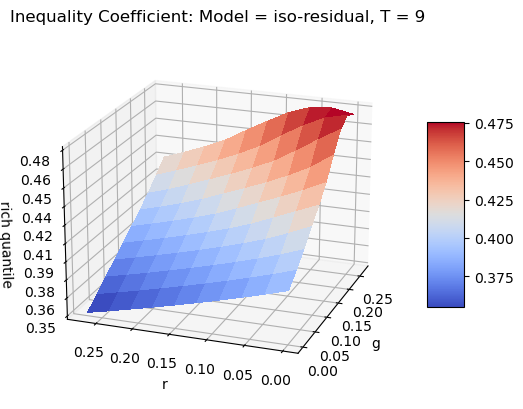

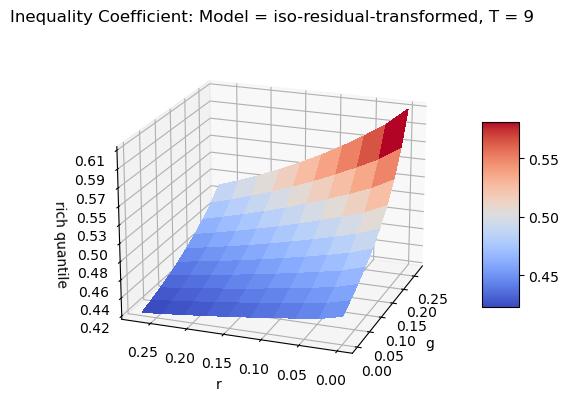

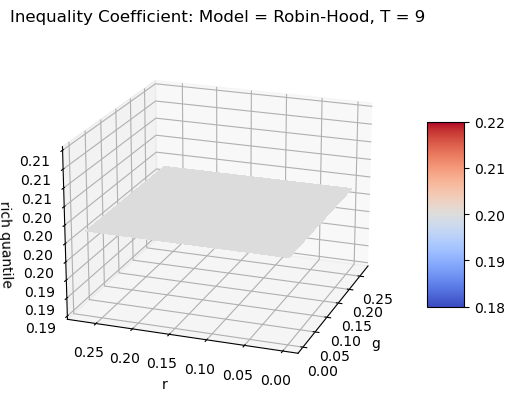

In [20]:
model = ["linear", "abgeltung", "income", "federal", "iso-residual", 
         "iso-residual-transformed", "Robin-Hood"]

#model = "federal"

measure = "rich quantile"

# Number of datapoints
n = 10

#Limits
maxG = 0.3
maxK = 0.3

#End of Period
T = 10

for model in model:

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    # Make data.
    G = np.arange(0, maxG, maxG / n)
    K = np.arange(0, maxK, maxK / n)
            
    # Indequallity Index
    I = np.array([ [inequality_index(T = T, g = g, k = k, model = model, measure = measure ) for g in G ] for k in K])
    
    if model == "Robin-Hood":
        # Smootjing the calculation errors
        I = np.round(I, 2)
    
    G, K = np.meshgrid(G, K)
    
    # Plot the surface.
    surf = ax.plot_surface(G, K, I, cmap = cm.coolwarm,
                           linewidth = 0, antialiased = False)
    
    
    plt.title("Inequality Coefficient: Model = %s, T = %i" % (model, T - 1) )
    # Customize the z axis.
    #ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.view_init(20, 200)
    
    ax.set_xlabel("g")
    ax.set_ylabel("r")
    ax.set_zlabel(measure)
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

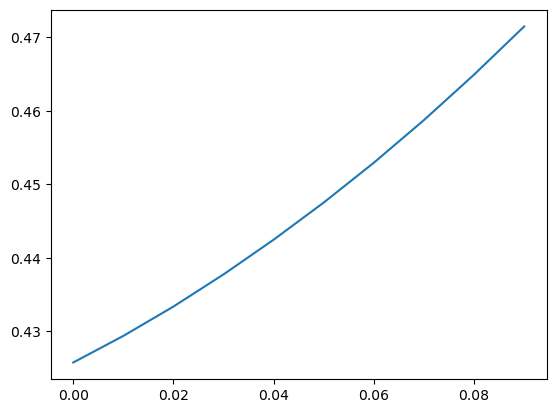

In [22]:
#Plot Single g
fig = plt.figure()

#g = 0.02845 
k = 0.0728 

# Make data.
G = np.arange(0, 0.1, 0.01)

model = "income"
measure = "rich quantile"
        
# Indequallity Index
I = np.array( [inequality_index(T = T, g = g, k = k, model = model, measure = measure ) for g in G ] )

plt.plot(G,I)

plt.show()

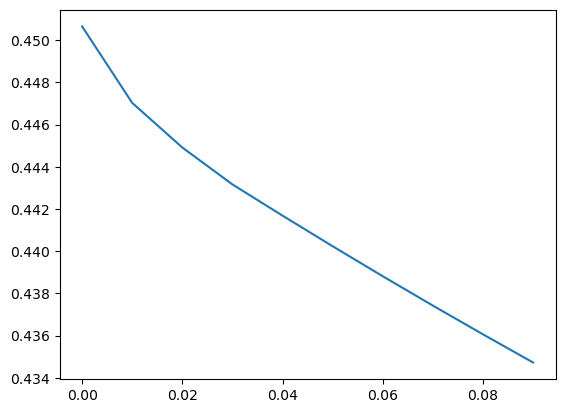

In [23]:
# Plot Single k
fig = plt.figure()

g = 0.02845 
#k = 0.0728 

# Make data.
K = np.arange(0, 0.1, 0.01)

model = "income"
measure = "rich quantile"
        
# Indequallity Index
I = np.array( [inequality_index(T = T, g = g, k = k, model = model, measure = measure ) for k in K ] )

plt.plot(K,I)

plt.show()